***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Web-traffic-example-for-the-ML-pipeline" data-toc-modified-id="A-Web-traffic-example-for-the-ML-pipeline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Web traffic example for the ML pipeline</a></span></li><li><span><a href="#Data-ingestion,-data-preparation,-EDA,-problem-definition" data-toc-modified-id="Data-ingestion,-data-preparation,-EDA,-problem-definition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data ingestion, data preparation, EDA, problem definition</a></span><ul class="toc-item"><li><span><a href="#Reading-and-inspecting-the-data" data-toc-modified-id="Reading-and-inspecting-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading and inspecting the data</a></span></li><li><span><a href="#Convert-the-data-into-numpy-arrays" data-toc-modified-id="Convert-the-data-into-numpy-arrays-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Convert the data into numpy arrays</a></span></li><li><span><a href="#Basic-data-cleaning:-remove-invalid-entries" data-toc-modified-id="Basic-data-cleaning:-remove-invalid-entries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Basic data cleaning: remove invalid entries</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA):-Visualize-the-data" data-toc-modified-id="Exploratory-Data-Analysis-(EDA):-Visualize-the-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA): Visualize the data</a></span></li><li><span><a href="#Practical-question-of-interest-to-be-answered" data-toc-modified-id="Practical-question-of-interest-to-be-answered-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Practical question of interest to be answered</a></span></li><li><span><a href="#A-regression-problem" data-toc-modified-id="A-regression-problem-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>A regression problem</a></span><ul class="toc-item"><li><span><a href="#Inductive-bias" data-toc-modified-id="Inductive-bias-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Inductive bias</a></span></li><li><span><a href="#Parametric-assumption" data-toc-modified-id="Parametric-assumption-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Parametric assumption</a></span></li></ul></li></ul></li><li><span><a href="#First-guess-for-the-regression-model:---$f$-is-a-linear-function" data-toc-modified-id="First-guess-for-the-regression-model:---$f$-is-a-linear-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First guess for the regression model:  <span style="color: red"> $f$ is a linear function</span></a></span><ul class="toc-item"><li><span><a href="#Loss-function:-SSE,-Sum-of-Squared-Errors-(Residuals)" data-toc-modified-id="Loss-function:-SSE,-Sum-of-Squared-Errors-(Residuals)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loss function: SSE, Sum of Squared Errors (Residuals)</a></span></li><li><span><a href="#Use-scipy-methods-to-find-the-best-line-(polynomial)-for-the-data" data-toc-modified-id="Use-scipy-methods-to-find-the-best-line-(polynomial)-for-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Use <code>scipy</code> methods to find the <em>best</em> line (polynomial) for the data</a></span></li><li><span><a href="#SSE-is-large!" data-toc-modified-id="SSE-is-large!-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SSE is large!</a></span></li><li><span><a href="#Visualize-the-trained-model" data-toc-modified-id="Visualize-the-trained-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Visualize the trained model</a></span></li><li><span><a href="#Check-the-reliability-of-the-predictions" data-toc-modified-id="Check-the-reliability-of-the-predictions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Check the reliability of the predictions</a></span></li></ul></li><li><span><a href="#Second-guess-for-the-regression-model:---$f$-is-a-quadratic-function" data-toc-modified-id="Second-guess-for-the-regression-model:---$f$-is-a-quadratic-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Second guess for the regression model:  <span style="color: red"> $f$ is a quadratic function</span></a></span></li><li><span><a href="#Wild-guesses-for-the-regression-model:--$f$-is-a-polynomial-function-of-higher-order" data-toc-modified-id="Wild-guesses-for-the-regression-model:--$f$-is-a-polynomial-function-of-higher-order-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><em>Wild</em> guesses for the regression model: <span style="color: red"> $f$ is a polynomial function of higher order</span></a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Observations</a></span></li></ul></li><li><span><a href="#Which-model-to-use-to-represent-the-data-and-make-predictions?" data-toc-modified-id="Which-model-to-use-to-represent-the-data-and-make-predictions?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Which model to use to represent the data and make predictions?</a></span></li><li><span><a href="#Step-back,-give-another-look-at-the-results-from-EDA" data-toc-modified-id="Step-back,-give-another-look-at-the-results-from-EDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step back, give another look at the results from EDA</a></span></li><li><span><a href="#Piecewise-model:-linear-+-quadratic" data-toc-modified-id="Piecewise-model:-linear-+-quadratic-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Piecewise model: <span style="color: red">linear + quadratic</span></a></span></li><li><span><a href="#Answer-our-original-question:-when-do-the-web-hits-will-reach-100,000?" data-toc-modified-id="Answer-our-original-question:-when-do-the-web-hits-will-reach-100,000?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Answer our original question: when do the web hits will reach 100,000?</a></span><ul class="toc-item"><li><span><a href="#Confidence-in-the-predictions?" data-toc-modified-id="Confidence-in-the-predictions?-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Confidence in the predictions?</a></span></li></ul></li></ul></div>

***
# A Web traffic example for the ML pipeline 

We've got the statistics for the first month of operation of a new web service. Data is aggregated in the `web_traffic.tsv` file (.tsv because it contains tab-separated values). 

Each file record contains the hour (consecutively) and the number of web hits in that hour.
***

# Data ingestion, data preparation, EDA, problem definition

## Reading and inspecting the data

In [2]:
import pandas as pd

# read data
data = pd.read_csv("../datasets/web_traffic.tsv", delimiter="\t")

In [3]:
data

Hour    Hits
0       1  2272.0
1       2     NaN
2       3  1386.0
3       4  1365.0
4       5  1488.0
..    ...     ...
738   739  4970.0
739   740  4813.0
740   741  5392.0
741   742  5906.0
742   743  4881.0

[743 rows x 2 columns]

In [4]:
data.info

<bound method DataFrame.info of      Hour    Hits
0       1  2272.0
1       2     NaN
2       3  1386.0
3       4  1365.0
4       5  1488.0
..    ...     ...
738   739  4970.0
739   740  4813.0
740   741  5392.0
741   742  5906.0
742   743  4881.0

[743 rows x 2 columns]>

In [5]:
data.columns

Index(['Hour', 'Hits'], dtype='object')

In [6]:
data.tail(20)

Hour    Hits
723   724  4813.0
724   725  3997.0
725   726  4357.0
726   727  4322.0
727   728  4156.0
728   729  4630.0
729   730  4415.0
730   731  4410.0
731   732  4724.0
732   733  4363.0
733   734  4798.0
734   735  4749.0
735   736  5143.0
736   737  4906.0
737   738  4309.0
738   739  4970.0
739   740  4813.0
740   741  5392.0
741   742  5906.0
742   743  4881.0

## Convert the data into numpy arrays

Let's just get the data and transform the `DataFrame` into a (purely) numeric numpy `array` 

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data = data.values

In [9]:
type(data)

numpy.ndarray

In [10]:
import numpy as np

In [11]:
data.shape

(743, 2)

In [12]:
data[1:10, ]

array([[2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       [4.000e+00, 1.365e+03],
       [5.000e+00, 1.488e+03],
       [6.000e+00, 1.337e+03],
       [7.000e+00, 1.883e+03],
       [8.000e+00, 2.283e+03],
       [9.000e+00, 1.335e+03],
       [1.000e+01, 1.025e+03]])

Let's store the data in two separated named arrays

In [13]:
hours = data[:,0]
web_hits = data[:,1]

## Basic data cleaning: remove invalid entries

In [14]:
import scipy as sp

# check for invalid data
nans = sp.sum(sp.isnan(web_hits))

print('There are {} invalid entries (NaN)'.format(nans))
#print(sp.isnan(web_hits))  # this is an array of T/F entries, F correspond to a valid entry

There are 8 invalid entries (NaN)


In [15]:
# let's remove invalid entries
valid_entries = ~sp.isnan(web_hits)  # change T into F and vice versa
# print(valid_entries)

hours = hours[valid_entries]
web_hits = web_hits[valid_entries]

## Exploratory Data Analysis (EDA): Visualize the data

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 90 # set the resolution to x dpi

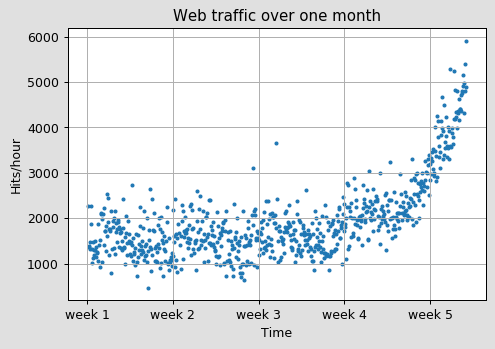

In [17]:
# visualize the data
plt.figure(facecolor='#E0E0E0') # optional, makes a grey background

plt.title("Web traffic over one month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(0,5)], ['week {}'.format(w) for w in range(1,6)] )

# scatter plot of the pairs (hour, hits)
plt.scatter(hours, web_hits, s=5)

# draw a slightly opaque, dashed grid, optional
plt.grid(True, linestyle='-')

plt.show()

# check matplotlib tutorials for more visualization options
# http://matplotlib.org/users/pyplot_tutorial.html

We can observe that traffic was quite steady for the first part of the month, but then it shows a quite dramatic increase starting from the beginning of week 4. 

## Practical question of interest to be answered  

**Will the server handle the incoming web traffic? (e.g., we know we can handle up to 100,000 hits/h)**

One way to answer the question is to proceed in two steps:
1. Find a model that can well describe the (noisy) data points, relating time/day and expected number of hits<br><p>
    
1. Use the model to extrapolate into the future to find the point in time where the server infrastructure has to be extended to handle incoming traffic

<u>Finding a model:</u> since all we have is data, we can try to **learn** a model using the data 

## A regression problem

We are looking for a scalar function: <span style="color:red">$$f: Time\subseteq \mathbb{R}^+\to Hits\subseteq \mathbb{R}^+.$$</span>
>$hits\in Hits$ can be regarded as a **random variable**.
    
In the ML jargon, we are looking for a **regression model**, $Y=f(\bf{X})$, where *time* is the **predictor variable** and *hits* is the **predicted output.**

<u>Goal</u>: The regression model that we are aiming to learn is not only meant to fit (represent) the data that we have, but, more interestingly, to rather provide robust predictions for unseen data, i.e., for what will happen in the future in terms of number of hits

- Which **class of functions** can well represent the data? <br><p>

- Potentially, <u>infinite classes of functions</u> could be a good fit!!

<div>
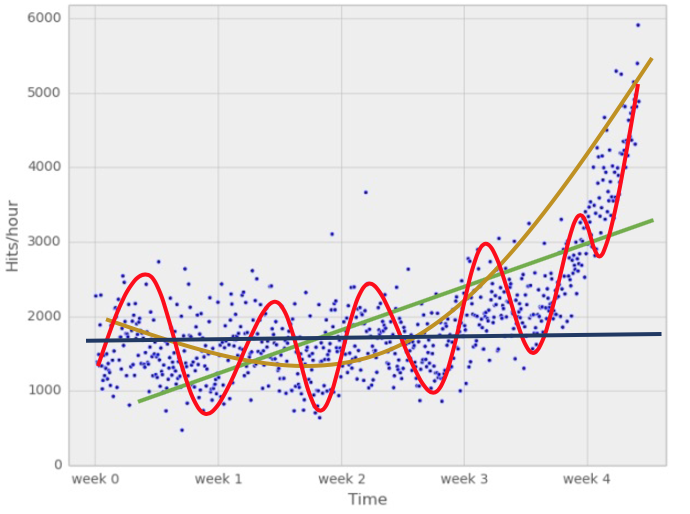
</div>


### Inductive bias

- We need to formulate a working **hypothesis**, in order to restrict the universe of possibilities and focus/direct the learning process <br><p>

- <u> Inductive bias: </u> We make the hypothesis that the *best regression function* $f$ belongs to <span style="color:red">some specific class $\mathcal{H}$ </span> <br><p>

- E.g., polynomials, exponentials, gaussians, splines, beta functions, periodic functions, ...


### Parametric assumption

We conveniently assume that each function $f\in \mathcal{H}$, $f: X \to Y$, can be fully described by a **set (vector) of parameters**, $\bf{w}$, such that:<br><p> $$f(X) \equiv f(X; \bf{w})$$


- **Linear functions / Polynomials of order 1 or 0:**

    Examples for the case of one-dimensional (**univariate**) functions:
    
    $$\begin{aligned}
    & f(x) = w_1x + w_0\\[1ex]
    & f(x) = w_1x\\[1ex]
    & f(x) = w_0
    \end{aligned}
    $$
    
    Examples for the case of multi-dimensional (**multivariate**) functions:
    
    $$\begin{aligned}
    & f(x_1, x_2, x_3) = w_1x_1 + w_2x_2 + w_3x_3 + w_0\\[1ex]
    & f({\bf x}) = {\bf w}\cdot {\bf x}, \quad {\bf w}=[w_0\ w_1\ w_2\ \ldots\ w_n]^T, \quad{\bf x} = [1\ x_1\ x_2\ \ldots\ x_n]^T\ \\[1ex]
    \end{aligned}
    $$

- **Polynomials of order $n>1$:**

    General form of **univariate** polynomial functions of order $n$:
    
    $$
    w_{n}x^{n}+w_{n-1}x^{n-1}+\dotsb +w_{2}x^{2}+w_{1}x+w_{0}
    $$
    

Let's see how polynomials of different degrees look like

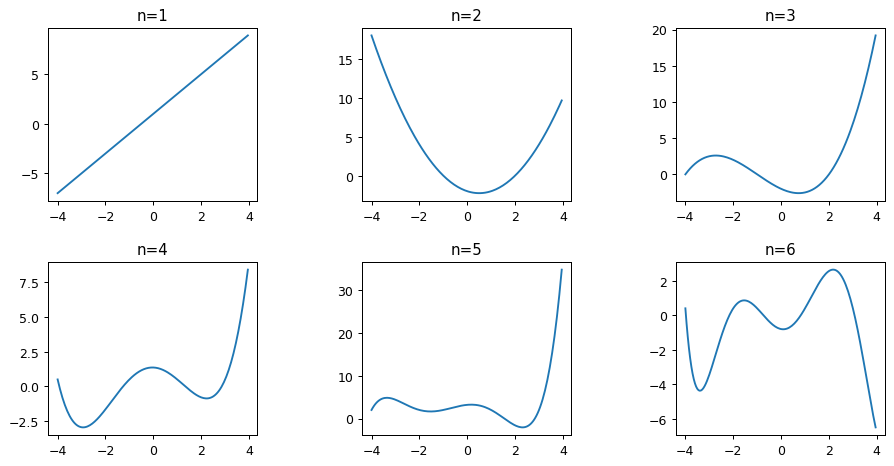

In [18]:
nrows = 2
ncols = 3
figure, subplots = plt.subplots(nrows, ncols, figsize=(12, 6))

xvals = np.arange(-4, 4, 0.05)
titles = [['n=1', 'n=2', 'n=3'], ['n=4', 'n=5', 'n=6']]
polynomials = [
        [ [(2*x + 1) for x in xvals ], 
          [(x**2 - x - 2) for x in xvals ],
          [( (x**3)/4 + (x**2)*(3/4) -x*(3/2) - 2 ) for x in xvals ] ], 
        [ [( (1/14)*(x + 4)*(x+1)*(x-1)*(x-3)+0.5) for x in xvals ],
          [( (1/20)*(x + 4)*(x + 2)*(x+1)*(x-1)*(x-3)+ 2) for x in xvals ], 
          [( (1/100)*(x**6 - 2*x**5 - 26*x**4 + 28*x**3 + 145*x**2 - 26*x - 80) ) for x in xvals ] ]
        ]
        
for i in range(nrows):
    for j in range(ncols):
        subplots[i, j].plot(xvals, polynomials[i][j])
        subplots[i, j].set_title(titles[i][j])
       
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

plt.show()

# First guess for the regression model:  <span style="color:red"> $f$ is a linear function</span> 
    
$$f(x) = w_1x + w_0$$
    
where the predictor variable $x$ is time. We need to estimate the **slope,** $w_1$, and the **intercept,** $w_0$

The figure shows a subset of the possible lines that could model the data.

<div>
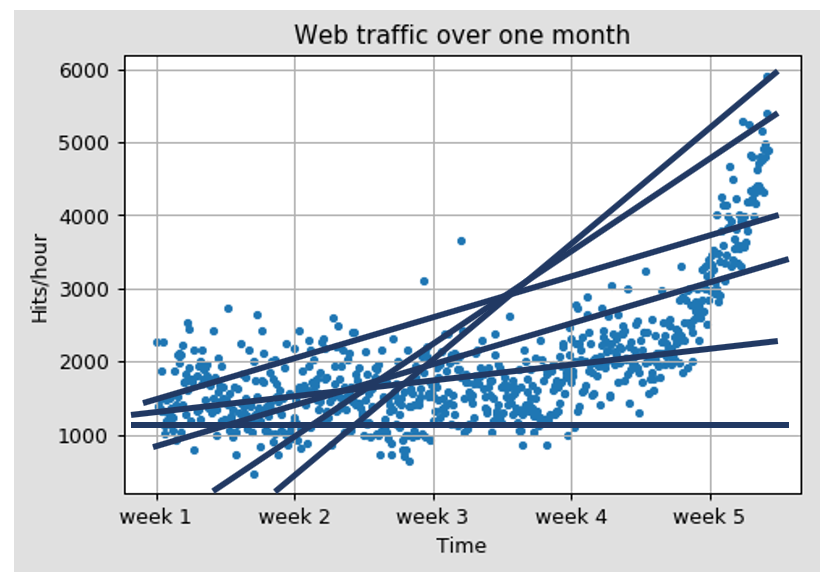
</div>


*Best* slope and intercept with respect to **which criterion for measuring the quality of the model?**

## Loss function: SSE, Sum of Squared Errors (Residuals)

<br><p>
<div>
    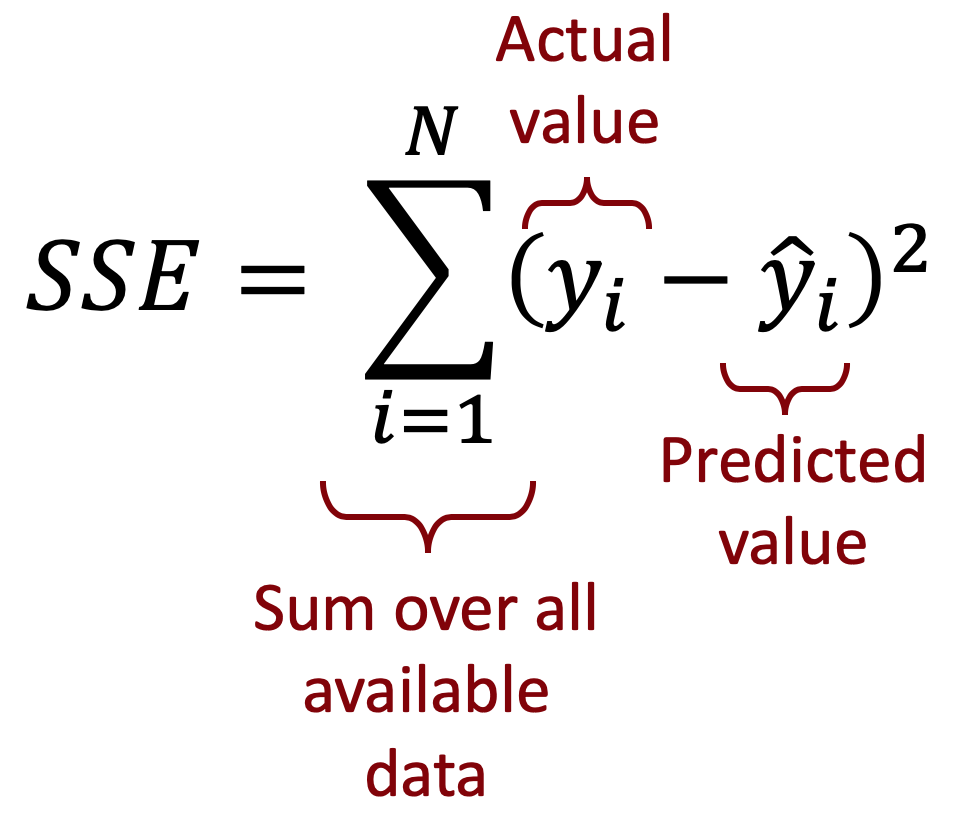
</div>

## Use `scipy` methods to find the *best* line (polynomial) for the data

`polyfit(x, y, order, full=True)`

- `x` and `y` are arrays containing the $(x_i, y_i)$  pairs in the dataset (must have the same dimensions)<br><p>

- `order` is the order of the polynomial we are trying to fit based on the SSE criterion<br><p>

- `full` is a parameter that once set to `True` makes the function returning full information about the process



In [19]:
# call polyfit with order 1, to fit a line model
poly_order = 1
model_params, SSE, rank, sv, rcond = sp.polyfit(hours, web_hits, poly_order, full=True)

print('Model parameters: {:.3f} (Slope), {:.3f} (Intercept) - SSE: {:.3g}'.format(model_params[0], 
                                                                                    model_params[1], SSE[0]))

Model parameters: 2.596 (Slope), 989.025 (Intercept) - SSE: 3.17e+08


The regression line is therefore:
$$\hat{y} = f(hours) = 2.596\cdot hours + 989.025$$

where $\hat{y}$ correspond to the predicted web hits for a given hour.

## SSE is large! 

Both SSE and the **Mean SSE (MSSE)** are large: $$\frac{SSE}{N} = 4.27\text{e}+05$$

This means that, most likely, our linear hypothesis is not a good one. 

## Visualize the trained model

Let's visualize the linear trained model of our data in order to get a better idea. 

We can conveniently use `poly1d(model)` to create a linear model function from the computed model parameters.

<u>Note:</u> the `1d` in `poly1d` refers to the fact yhat the function builds a **univariate** polynomial model of any given order out of the model parameters passed as input. 

In [20]:
linear_model = sp.poly1d(model_params)
print(linear_model, type(linear_model))  # we get a nice print out of the model!

 
2.596 x + 989 <class 'numpy.lib.polynomial.poly1d'>


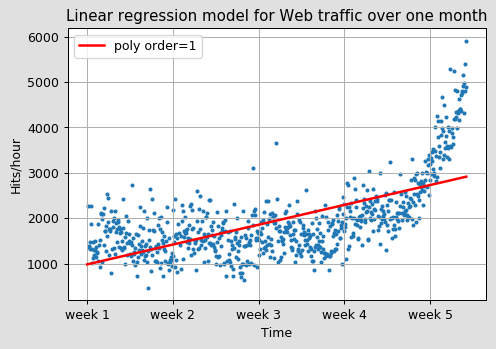

In [21]:
plt.figure(facecolor='#E0E0E0')
plt.title("Linear regression model for Web traffic over one month")

# this is the same as before, plot the training data
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(0,5)], ['week {}'.format(w) for w in range(1,6)] )
plt.scatter(hours, web_hits, s=5)
plt.grid(True, linestyle='-')

# here we add the plot of the linear function
x = np.linspace(0, hours[-1], 1000) # generate x-values for plotting
plt.plot(x, linear_model(x), linewidth=2, color='r')
plt.legend(['poly order={}'.format(linear_model.order)], loc="upper left")
plt.show()

## Check the reliability of the predictions

The linear model is a relatively good predictor for the first 3 weeks, but then it becomes a poor predictor, as it is shown by the data below.

In [22]:
one_week = 7*24 

for t in [one_week, 2*one_week, 4*one_week, int(4.3 * one_week)]:
    print('Time {}: Actual web hits {:.2f}'
          '- Predicted web hits {}'
          '- Squared residual {:.2g}'.format(t, linear_model(t), web_hits[t],
                                       (linear_model(t) - web_hits[t])**2))

Time 168: Actual web hits 1425.19- Predicted web hits 1650.0- Squared residual 5.1e+04
Time 336: Actual web hits 1861.35- Predicted web hits 1246.0- Squared residual 3.8e+05
Time 672: Actual web hits 2733.67- Predicted web hits 4000.0- Squared residual 1.6e+06
Time 722: Actual web hits 2863.48- Predicted web hits 4410.0- Squared residual 2.4e+06


- In general we can observe that the linear hypothesis doesn't seem a good one for the data.<br><p>

- The SSE seems large. Is that true? We should try out different models and compare the SSEs.

# Second guess for the regression model:  <span style="color:red"> $f$ is a quadratic function</span> 
    
$$f(x) = w_2x^2 + w_1x + w_0$$
    
where the predictor variable $x$ is time. We need to estimate three parameters, $w_0, w_1, w_2$

In [23]:
# call polyfit with order 2, to fit a quadratic model
poly_order = 2
model_params, SSE, rank, sv, rcond = sp.polyfit(hours, web_hits, poly_order, full=True)

print('Model parameters: {:.3f} {:.3f}'
      ' {:.3f} - SSE: {:.3g}'.format(model_params[0], model_params[1], 
                                     model_params[2], SSE[0]))

Model parameters: 0.011 -5.265 1974.761 - SSE: 1.8e+08


One good news: the SSE is now half of the value of that of the linear model! (but it's still large, apparently)

In [24]:
# as before, we can use the poly1d() function to build the univariate polynomial model 
# of order 2 out of the parameters computed using the training data

quadratic_model = sp.poly1d(model_params)
print(quadratic_model)

         2
0.01053 x - 5.265 x + 1975


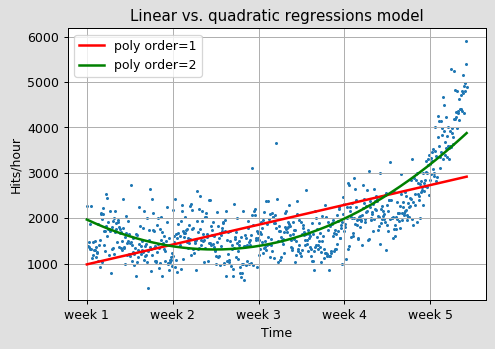

In [25]:
# Let's add to the previous plot the new regression curve

plt.figure(facecolor='#E0E0E0')
plt.title("Linear vs. quadratic regressions model")

# this is the same as before, plot the training data
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(0,5)], ['week {}'.format(w) for w in range(1,6)] )
plt.scatter(hours, web_hits, s=2)
plt.grid(True, linestyle='-')

# plot of the linear function
x = np.linspace(0, hours[-1], 1000) # generate x-values for plotting
plt.plot(x, linear_model(x), linewidth=2, color='r')

# plot of the quadratic function
plt.plot(x, quadratic_model(x), linewidth=2, color='g')

# plot the legends
plt.legend(['poly order={}'.format(linear_model.order), 
            'poly order={}'.format(quadratic_model.order)], loc="upper left")
plt.show()

# *Wild* guesses for the regression model: <span style="color:red"> $f$ is a polynomial function of higher order</span>  

If a **more complex hypothesis** (quadratic vs. linear) gives better results, why not increase the complexity even more? Let's try it for degrees 3, 10, 100, ...

More in general, let's make the hypothesis that 
**$f$ is a polynomial function of higher order:**


$$f(x) = w_nx^n + w_{n-1}x^{n-1} + \ldots w_1x + w_0$$
    
where $n > 1$, and we need to estimate $n+1$ parameters, $w_0, w_1, \ldots, w_n$



In [26]:
# this computes the SSE loss function
def SSE(f, x, y):
    return sp.sum((f(x)-y)**2)

Let's try polynomial models of order 3,5,10,50,100

In [27]:
poly_order = [3, 5, 10, 50, 100]

In [28]:
# same computations as before, looping over the selected polynomial orders
models = []

for n in poly_order:
    model_params = sp.polyfit(hours, web_hits, n)
    poly_model = sp.poly1d(model_params)
    
    print('Order: {} - SSE: {:.2g}'.format(n, SSE(poly_model, hours, web_hits)))
    
    models.append(poly_model)

Order: 3 - SSE: 1.4e+08
Order: 5 - SSE: 1.2e+08
Order: 10 - SSE: 1.2e+08
Order: 50 - SSE: 1.1e+08
Order: 100 - SSE: 1.1e+08


/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:578: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/Users/giannidicaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


The overfitting creates numeric problems (*conditioning* of the data matrix)

Visualization of the results

Order: 3 - SSE: 1.3935e+08
Order: 5 - SSE: 1.2446e+08
Order: 10 - SSE: 1.2194e+08
Order: 50 - SSE: 1.095e+08
Order: 100 - SSE: 1.0945e+08


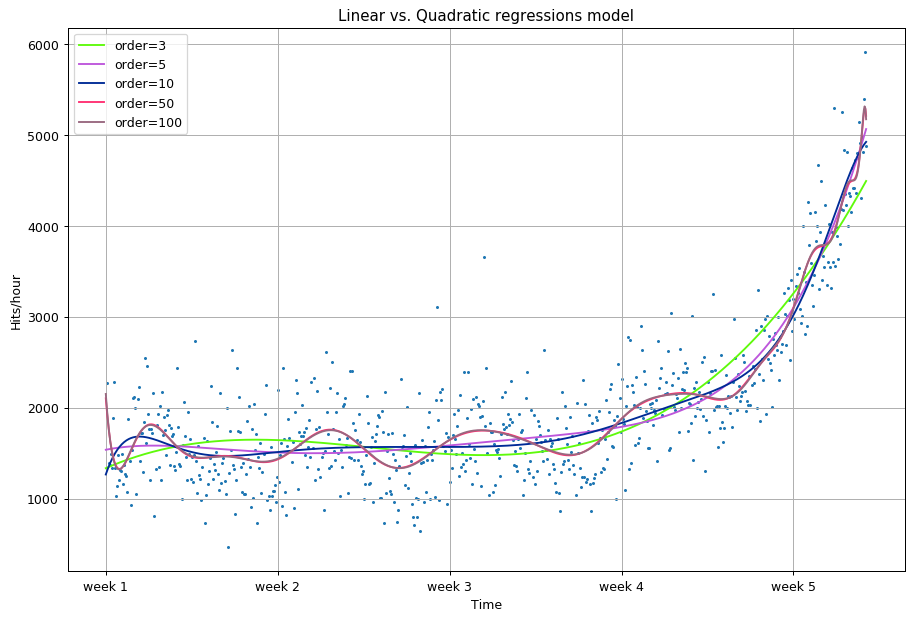

In [29]:
import random as rnd  # only used to generate plot colors at random

# new figure, new size and title
plt.figure(figsize=(12,8))
plt.title("Linear vs. Quadratic regressions model")

# labeling is the same as before
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(0,5)], ['week {}'.format(w) for w in range(1,6)] )
plt.scatter(hours, web_hits, s=2)
plt.grid(True, linestyle='-')

x = np.linspace(0, hours[-1], 1000) # generate x-values, a range of hours, for plotting

# add legend for each plot
legends = []
for i, n in enumerate(poly_order):
    legend, = plt.plot(x, models[i](x), linewidth=1.5, 
                       color=(rnd.uniform(0,1), rnd.uniform(0,1), rnd.uniform(0,1)),
                       label='order={}'.format(n))
    legends.append(legend)
    
    print('Order: {} - SSE: {:.5g}'.format(n, SSE(models[i], hours, web_hits)))

plt.legend(handles=legends)
plt.show()

## Observations

- It seems that the curves capture better the fitted data the more complex the model becomes.<br><p>

- The errors seem to tell the same story.<br><p>
    
- One question however arises: do the model curves capture the true process that generated the data (as they become more complex)? Framed differently, do our models correctly represent the underlying mass behavior of customers visiting the web site? <br><p>

- Looking at the polynomial of higher degrees, an oscillating behavior can be noticed. It seems that the models are **fitted too much to the data.** So much that it is now capturing not only the underlying process but also the <u>noise.</u> This is called **overfitting.**

# Which model to use to represent the data and make predictions?

Different actions are possible:

- Choose one of the fitted polynomial models.<br><p>
    > Which one? The linear clearly is too simple, and the
models of order 10 and 50 are clearly overfitting. Only the second and third order
models seem to somehow match the data. However, if we extrapolate them at both
borders, we see that they would not provide a good prediction for our original quest.

- Switch to another, maybe more complex model class.<br><p>
    > Which new class of models? Splines? Do we have fully understood the data to make an informed choice?

- Think differently about the data and start again.
    > It looks like the best option after this first statge of EDA and model guessing.

# Step back, give another look at the results from EDA 

It seems that there is an **inflection point** between weeks 3 and 4. 

$\rightarrow$ Let's <span style="color:red">separate the data and train two models, using week 3.5 as a separation point:</span>

- Use a **linear model** for the first part<br><p>
- Use a **quadratic model** for the second part

# Piecewise model: <span style="color:red">linear + quadratic</span> 

In [30]:
inflection = int(3.5*7*24) # set the inflection point, in hours

xa = hours[:inflection] # data before the inflection point
ya = web_hits[:inflection]

xb = hours[inflection:] # data after
yb = web_hits[inflection:]

model_a = sp.poly1d(sp.polyfit(xa, ya, 1))  # linear model
model_b = sp.poly1d(sp.polyfit(xb, yb, 2))  # quadratic model

model_a_SSE = SSE(model_a, xa, ya)
model_b_SSE = SSE(model_b, xb, yb)

print('Total error using two different models = {:.5g}'.format(model_a_SSE + model_b_SSE))


Total error using two different models = 1.3058e+08


The total error is less than that of the polynomial of order 3 considered before.

Let's see if visualization confirms that the solution is a good one!

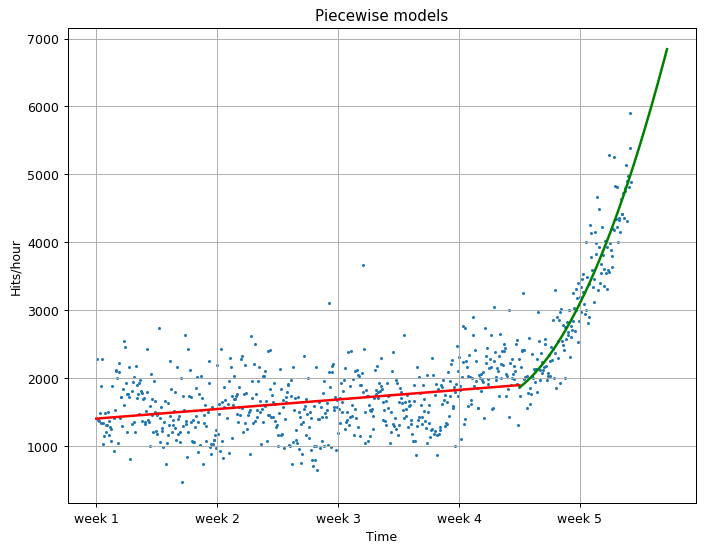

In [31]:
# Let's add to the previous plot the new regression curve

plt.figure(figsize=(9, 7))
plt.title("Piecewise models")

# this is the same as before, plot the training data
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(0,5)], ['week {}'.format(w) for w in range(1,6)] )
plt.scatter(hours, web_hits, s=2)
plt.grid(True, linestyle='-')

# plot of the linear model
x_a = np.linspace(0, inflection, 1000) # generate x-values for plotting
plt.plot(x_a, model_a(x_a), linewidth=2, color='r')

# plot of the quadratic model
x_b = np.linspace(inflection+1, x[-1]+50, 1000) # generate x-values for plotting
plt.plot(x_b, model_b(x_b), linewidth=2, color='g')

plt.show()

**It looks pretty good now!!**

- But, how do we get a sound evaluation of our model choices?<br><p>

- We'll see this next time!

# Answer our original question: when do the web hits will reach 100,000?

- Having a polynomial of degree 2, we could simply compute the inverse of the function
and calculate its value at 100,000. <br><p>

- However, we prefer to have an approach that is applicable to any model function easily: let's use `scipy` again!

We can proceed as follows:


- By subtracting 100,000 from the polynomial, this results in another polynomial, whose root (zero) corresponds to the value of `x` that makes the polynomial equal to 100,000, which is what we are looking for!<br><p>

$$f(x) = K\quad \leftrightarrow\quad F(x) = f(x)-K\quad \rightarrow F(x) = 0$$


- SciPy's `optimize` module has the function `fsolve()` precisely finds the roots of a function. It only requires an initial starting position as parameter $x_0$

In [32]:
from scipy.optimize import fsolve

reached_max = fsolve( model_b - 100000, x0=800) / (7*24)
print("100,000 hits/hour expected at week {:.2f}".format(reached_max[0]))


100,000 hits/hour expected at week 9.84


## Confidence in the predictions?

- There is an **uncertainty** involved with our prediction. <br><p>

- To get a real picture of it, we would need more sophisticated statistics and reasoning to find out about the
**variance** we have to expect when looking farther and farther into the future.<br><p>

- We can also keep retraining the model as we get more data. <br><p>

- More about this later in the course ...